In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn import svm

%matplotlib inline

seed = 42

df = pd.read_csv("heart_attack.csv")
len(df)

294

In [2]:
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294,294,294,294,294,294,294.000000,294,294,294,294.000000
unique,NaN,NaN,NaN,32,154,3,4,72,3,NaN,4,2,4,NaN
top,NaN,NaN,NaN,120,?,0,0,150,0,NaN,?,?,?,NaN
freq,NaN,NaN,NaN,65,23,266,235,29,204,NaN,190,291,266,NaN
mean,47.826531,0.724490,2.982993,NaN,NaN,NaN,NaN,NaN,NaN,0.586054,NaN,NaN,NaN,0.360544
std,7.811812,0.447533,0.965117,NaN,NaN,NaN,NaN,NaN,NaN,0.908648,NaN,NaN,NaN,0.480977
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


In [3]:
# replace "?" with "0"
df = df.replace("?", 0)

In [4]:
# Split data into training and testing sets
y = df["num       "]
X = df.drop(["num       "], axis=1)
# 20% of dataset goes to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [5]:
#Standardize the data
X_scaled = preprocessing.scale(X_train)
print(X_scaled.mean())
print(X_scaled.std())

-6.163463992681721e-17
0.9607689228305228


/home/leloy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  


In [6]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [7]:
#Evaluating the classifier using training set
from sklearn.metrics import accuracy_score
gbcy_pred = gbc.predict(X_test)
accuracy_score(gbcy_pred, y_test)

0.7966101694915254

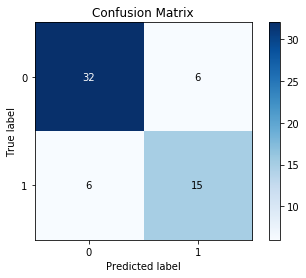

In [8]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=gbcy_pred)
plt.show()

In [9]:
import _pickle as cPickle
# save the classifier
with open('heart_attack_classifier.pkl', 'wb') as fid:
    cPickle.dump(gbc, fid) 

In [10]:
# load it again
with open('heart_attack_classifier.pkl', 'rb') as fid:
    gnb_loaded = cPickle.load(fid)